<h1 style="color:brown;">  Hands on practice with neural network</h1> 

### Lesson plan

1. How to evaluate a model? <a href="https://colah.github.io/posts/2015-09-Visual-Information/">cross-entropy</a>
2. Types of Neural Nets
3. Keras & Tensorflow - specialized framework (python library) for machine learning
4. Hands on image reconstruction with Keras (approximately PCA)

### Some types of neural networks  

- Classic - what we did on Friday
- Auto-encoder (like PCA finding compressed representation) - now

the hidden layer is an encoding of the generalization
- Recurrent neural network - coming soon
- Convlutional neural networks - coming soon

![](./img/RNN.png)

![](./img/CNN.png)

![](./img/autorec.png)

### 3. Tensorflow and Keras
##### An Example

### Image Classification
[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) is a common benchmark in machine learning for image recognition. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

<img align =left src="./img/c10imgcat.png">

<img align =left src="./img/tf-logo3.png"><br>


This task can be accomplished in TensorFlow and the code can be found [here](https://github.com/tensorflow/models/tree/master/tutorials/image/cifar10/). Let's look at it together. 

<img align =left src="./img/keras.png"><br>

Now, the same task in [in Keras](https://keras.io/examples/cifar10_cnn/). After looking at it and comparing it to the tensorflow code, what do you notice? Any formatting look familiar?

### Similar to another scenario we've seen:

![statsmodels](./img/statsmodels_hybi_banner.png)

vs

![sklearn](./img/sklearn.png )

### Okay, but should I use Keras or Tensorflow?
![wrong question](https://www.pyimagesearch.com/wp-content/uploads/2018/10/keras_vs_tensorflow_wrong_question.jpg)

### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](./img/keras_2.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](./img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](./img/cat-tensors.gif)

## TensorFlow at its start

An open-source library

![more-arch](./img/layers.png)

### 2007 Keras was fully integrated into TensorFlow

It "comes with" Tensorflow and provides all the medium to high end API services to integrate with tensorflow processing.

![tensorflow-prog](./img/tensorflow_programming_environment.png)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit mroe complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

## More levers and buttons

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](./img/levers.jpeg)

### Building our first Neural Network - Auto-encoder

#### Install Keras & tensorflow

In [ ]:
#!pip install tensorflow
#!pip install keras

### Keras basic syntax 

<a href="https://keras.io">Documentation</a>

In [1]:
import keras

Using TensorFlow backend.


In [2]:
## initialize the model
from keras.models import Sequential
from keras.layers import Input, Dense
model = Sequential()

In [3]:
## prepare a placeholder for input
# this is our input placeholder
inp = Input(shape=(784,)) # here shape (784, ) means we specify only the number of rows but we can input as many columns as we would like

In [4]:
## Adding layers --> simple as .add()
## Dense means linear layer + activation
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
# Option I - gradient descent
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mae', 'acc'])

# Option II - adadelta
# model.compile(optimizer='adadelta', loss='binary_crossentropy')

<a href="https://keras.io/optimizers/">more optimizers</a>

In [6]:
# Training the model!
import numpy as np
X_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
X_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical( np.random.randint(10, size=(100, 1)), num_classes=10)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=20,
                    validation_data=(X_test, y_test))

Train on 1000 samples, validate on 100 samples
Epoch 1/20
1000/1000 [==============================] - 0s 151us/step - loss: 0.0902 - mean_absolute_error: 0.1797 - acc: 0.0990 - val_loss: 0.0899 - val_mean_absolute_error: 0.1796 - val_acc: 0.1400
Epoch 2/20
1000/1000 [==============================] - 0s 13us/step - loss: 0.0899 - mean_absolute_error: 0.1796 - acc: 0.1270 - val_loss: 0.0898 - val_mean_absolute_error: 0.1795 - val_acc: 0.1200
Epoch 3/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0898 - mean_absolute_error: 0.1795 - acc: 0.1290 - val_loss: 0.0897 - val_mean_absolute_error: 0.1795 - val_acc: 0.1300
Epoch 4/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0897 - mean_absolute_error: 0.1794 - acc: 0.1340 - val_loss: 0.0898 - val_mean_absolute_error: 0.1795 - val_acc: 0.1500
Epoch 5/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.0896 - mean_absolute_error: 0.1794 - acc: 0.1400 - val_loss: 0.0898 - val_mea

In [7]:
# Results of the model over epochs
history.history['val_loss']

[0.08991129696369171,
 0.08978577703237534,
 0.08974892646074295,
 0.08975553512573242,
 0.0897822454571724,
 0.08979275822639465,
 0.0897708311676979,
 0.08972086757421494,
 0.08969695121049881,
 0.08971939980983734,
 0.0896952897310257,
 0.08971995115280151,
 0.08970843255519867,
 0.08972589671611786,
 0.08972682058811188,
 0.08970609307289124,
 0.08971836417913437,
 0.0896419882774353,
 0.08967863768339157,
 0.0896950364112854]

In [8]:
history.history['loss']

[0.09018653106689453,
 0.08988711100816726,
 0.08977449381351471,
 0.08968963438272476,
 0.08962961494922637,
 0.0895560467839241,
 0.08950113570690155,
 0.08943475377559662,
 0.08938107645511627,
 0.08931925976276398,
 0.08924993252754211,
 0.08918916916847229,
 0.08913121122121812,
 0.08907884407043457,
 0.08901661747694016,
 0.08896830826997756,
 0.0889140293598175,
 0.08885775083303452,
 0.08881059455871582,
 0.08874712240695953]

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Evaluate
loss_and_metrics = model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 41us/step


In [11]:
loss_and_metrics

[0.0896950376033783, 0.1793052613735199, 0.11]

In [12]:
### Useful
model.save('./model.h5') # Save your weights and computational graph
from keras.models import load_model
load_model('./model.h5') # loading the saved model from above

In [13]:
!ls -lah

total 136
drwxr-xr-x   6 zakijefferson  staff   192B Mar 30 14:44 .
drwxr-xr-x   9 zakijefferson  staff   288B Mar 30 10:36 ..
drwxr-xr-x   3 zakijefferson  staff    96B Mar 30 11:16 .ipynb_checkpoints
drwxr-xr-x  16 zakijefferson  staff   512B Mar 30 10:36 img
-rwxr-xr-x   1 zakijefferson  staff    18K Mar 30 11:18 intro-to-keras.ipynb
-rw-r--r--   1 zakijefferson  staff    46K Mar 30 14:44 model.h5


In [14]:
from keras.applications.vgg16 import VGG16

In [15]:
model = VGG16(weights='imagenet', include_top=False)
model.save('./vgg16.h5')

58892288/58889256 [==============================] - 39s 1us/step


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [17]:
ls -lath

total 115240
-rw-r--r--   1 zakijefferson  staff    56M Mar 30 14:44 vgg16.h5
drwxr-xr-x   7 zakijefferson  staff   224B Mar 30 14:44 ./
-rwxr-xr-x   1 zakijefferson  staff    27K Mar 30 14:44 intro-to-keras.ipynb*
-rw-r--r--   1 zakijefferson  staff    46K Mar 30 14:44 model.h5
drwxr-xr-x   3 zakijefferson  staff    96B Mar 30 11:16 .ipynb_checkpoints/
drwxr-xr-x  16 zakijefferson  staff   512B Mar 30 10:36 img/
drwxr-xr-x   9 zakijefferson  staff   288B Mar 30 10:36 ../


### Your exercise:  Image reconstruction using auto-encoder

##### Import dataset - Mnist (handwritten digits)

In [18]:
import os

In [19]:
import matplotlib.pyplot as plt

In [20]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model, Input
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, BatchNormalization
from keras.utils import np_utils

In [21]:
### a. Load the Mnist dataset and split to train/test (use mnist.load_data())
### b. Plot few images with their label
### c. reshape images to 784 dim vector and normalize (divide by 255)
### d. Create a new model with 1 Dense layers sized 32 (encoder) with relu layer. 
### Then add a dense layer sized 784 with sigmoid activation.
### Run it for 50 epochs with batches of 256. Use binary cross-entropy. 
### e. Plot the model loss
### f. Use predict to encode and decode x_test

In [22]:
# keras imports for the dataset and building our neural network
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D
)
from keras import backend as K

os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
## This is to avoid getting hundreds of log messages

In [23]:
from keras.models import Model

In [24]:
batch_size = 256
num_classes = 10
epochs = 5

In [41]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

3

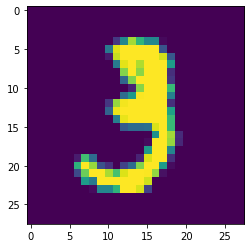

In [71]:
n = 10
plt.imshow(x_train[n])

# What it should be
y_train[n]

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])